# Runmeng Qin

## Research question/interests

## How effective are SPI ratings as the only predictor of match outcomes in the 2022 World Cup, and how does their accuracy change over the course of the tournament as more teams advance?



#### Each team has SPI ratings for each game,  which are a combination of each team's recent match results and the overall quality of its World Cup roster.  I'd be curious to see how well SPI ratings alone predicted the winner versus the real score, and whether that accuracy improves as more teams advance. 

#### I'm going to do is clean the data(wc_matches.csv) and group separate datasets by game date and team. I will use the columns of 'date', 'team1', 'team2', 'spi1', 'spi2', 'score1', 'score2' as the data basis for my research question. These data should be able to support my research question by comparing the relationship between team, spi and score under different dates.In addition, the potential relationship can be analyzed based on the score and spi ratio between the two teams in each match.

#### SPI is based on goals scored and allowed, not wins, losses and draws. Therefore, through the following analysis, the relationship between pre-match spi and post-match score can be observed. 

In [ ]:
import pandas as pd
df=pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_matches.csv")

In [ ]:
df_use=df[['date','team1','team2','spi1','spi2','score1','score2']]

In [ ]:
df_use.head()

,date,team1,team2,spi1,spi2,score1,score2
0,2022-11-20,Qatar,Ecuador,51.00,72.74,0,2
1,2022-11-21,England,Iran,85.96,62.17,6,2
2,2022-11-21,Senegal,Netherlands,73.84,86.01,0,2
3,2022-11-21,USA,Wales,74.83,65.58,1,1
4,2022-11-22,Argentina,Saudi Arabia,87.21,56.87,1,2


## EDA

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt 
import seaborn as sns

In [ ]:
df_use.shape

(64, 7)

In [ ]:
df_use.describe()

,spi1,spi2,score1,score2
count,64.000000,64.000000,64.000000,64.000000
mean,77.321094,74.295781,1.578125,1.109375
std,11.158028,10.785255,1.551289,1.055856
min,48.160000,48.460000,0.000000,0.000000
25%,68.747500,66.052500,0.000000,0.000000
50%,78.725000,74.460000,1.000000,1.000000
75%,87.232500,79.505000,2.000000,2.000000
max,93.660000,93.480000,7.000000,4.000000


In [ ]:
df_use.dtypes

date       object
team1      object
team2      object
spi1      float64
spi2      float64
score1      int64
score2      int64
dtype: object

In [ ]:
len(df_use['date'].unique())

23

In [ ]:
#In order to see the spi changes of different schedules of each team more clearly, 
#I will divide it into different dataframe for analysis respectively by the game schedule, and finally combine the analysis.
df_groupStage=df_use[0:48]
df_groupStage.head()
# group stage

,date,team1,team2,spi1,spi2,score1,score2
0,2022-11-20,Qatar,Ecuador,51.00,72.74,0,2
1,2022-11-21,England,Iran,85.96,62.17,6,2
2,2022-11-21,Senegal,Netherlands,73.84,86.01,0,2
3,2022-11-21,USA,Wales,74.83,65.58,1,1
4,2022-11-22,Argentina,Saudi Arabia,87.21,56.87,1,2


In [ ]:
df_roundOSixteen=df_use[48:56]
df_roundOSixteen

,date,team1,team2,spi1,spi2,score1,score2
48,2022-12-03,Netherlands,USA,83.97,73.07,3,1
49,2022-12-03,Argentina,Australia,87.98,59.35,2,1
50,2022-12-04,France,Poland,88.57,65.77,3,1
51,2022-12-04,England,Senegal,86.97,75.47,3,0
52,2022-12-05,Japan,Croatia,73.02,79.14,1,1
53,2022-12-05,Brazil,South Korea,92.90,69.40,4,1
54,2022-12-06,Morocco,Spain,74.42,89.20,0,0
55,2022-12-06,Portugal,Switzerland,85.80,78.51,6,1


In [ ]:
df_quarterFinals=df_use[56:60]
df_quarterFinals

,date,team1,team2,spi1,spi2,score1,score2
56,2022-12-09,Croatia,Brazil,78.99,93.47,1,1
57,2022-12-09,Netherlands,Argentina,84.19,87.32,2,2
58,2022-12-10,Morocco,Portugal,74.45,87.92,1,0
59,2022-12-10,England,France,87.59,87.53,1,2


In [ ]:
df_semifinal=df_use[60:62]
df_semifinal

,date,team1,team2,spi1,spi2,score1,score2
60,2022-12-13,Argentina,Croatia,87.46,79.37,3,0
61,2022-12-14,France,Morocco,87.72,75.13,2,0


In [ ]:
df_ThirdPlaceMatch=df_use[62:63]
df_ThirdPlaceMatch

,date,team1,team2,spi1,spi2,score1,score2
62,2022-12-17,Croatia,Morocco,77.65,73.92,2,1


In [ ]:
df_final=df_use[63:64]
df_final

,date,team1,team2,spi1,spi2,score1,score2
63,2022-12-18,Argentina,France,88.86,88.41,3,3


<seaborn.axisgrid.JointGrid>

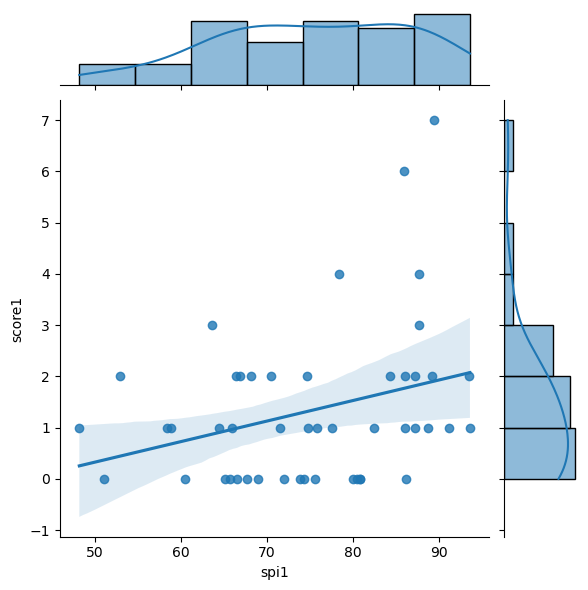

In [ ]:
sns.jointplot(x='spi1', y='score1', data=df_groupStage, kind='reg')

<seaborn.axisgrid.JointGrid>

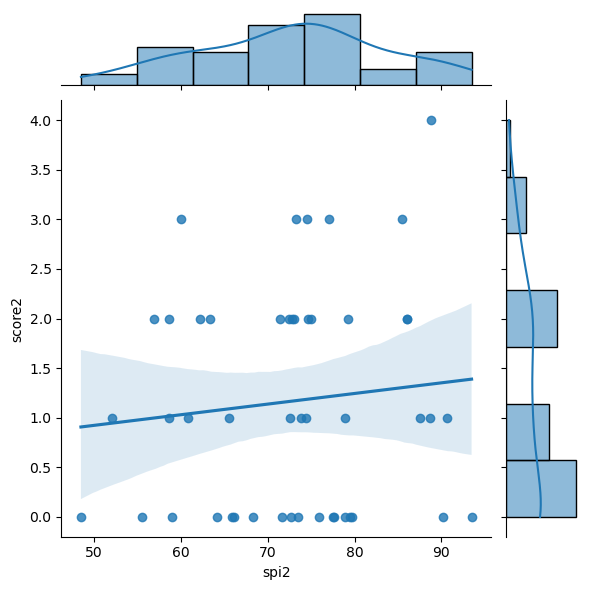

In [ ]:
sns.jointplot(x='spi2', y='score2', data=df_groupStage, kind='reg')

In [ ]:
#The two graphs above show that spi is proportional to score.

In [ ]:
groupstageSpi=df_groupStage["spi1"]+df_groupStage["spi2"]
groupstageSpi=sum(groupstageSpi)/len(groupstageSpi)
print(groupstageSpi)

147.91583333333335


In [ ]:
roundOSixteenSpi=df_roundOSixteen["spi1"]+df_roundOSixteen["spi2"]
roundOSixteenSpi=sum(roundOSixteenSpi)/len(roundOSixteenSpi)
print(roundOSixteenSpi)

157.9425


In [ ]:
quarterFinalspi=df_quarterFinals["spi1"]+df_quarterFinals["spi2"]
quarterFinalspi=sum(quarterFinalspi)/len(quarterFinalspi)
quarterFinalspi

170.365

In [ ]:
semifinalspi=df_semifinal["spi1"]+df_semifinal["spi2"]
semifinalspi=sum(semifinalspi)/len(semifinalspi)
print(semifinalspi)

164.83999999999997


In [ ]:
ThirdPlaceMatchspi=df_ThirdPlaceMatch["spi1"]+df_ThirdPlaceMatch["spi2"]
ThirdPlaceMatchspi=sum(ThirdPlaceMatchspi)/len(ThirdPlaceMatchspi)
print(ThirdPlaceMatchspi)

151.57


In [ ]:
finalspi=df_final["spi1"]+df_final["spi2"]
finalspi=sum(finalspi)/len(finalspi)
print(finalspi)

177.26999999999998


In [ ]:
import pandas as pd

In [ ]:
data={'Game Process':['groupstage','round of 16','quarter final','semi final','thitd place match','final'],'average spi':[147.91583333333335,157.9425
,170.365,164.839,151.57,177.269]}
averagespi=pd.DataFrame(data, columns=['Game Process','average spi'])
averagespi

,Game Process,average spi
0,groupstage,147.915833
1,round of 16,157.942500
2,quarter final,170.365000
3,semi final,164.839000
4,thitd place match,151.570000
5,final,177.269000


<Axes: xlabel='Game Process', ylabel='average spi'>

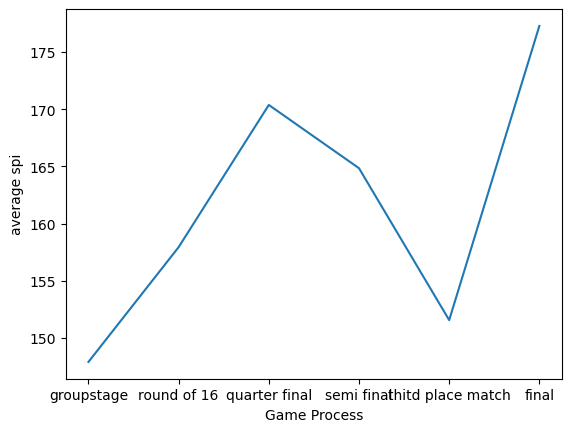

In [ ]:
import seaborn as sns
sns.lineplot(data=averagespi, x="Game Process", y="average spi")

#### The mean value of spi increased with the change of the schedule, but gradually decreased in the semi final and third place march, which may be related to the decrease of spi with the score of the team.

#### Refine your research questions:  Through EDA,  I have a general arrangement of my data and a general understanding of the relationship between columns. I will continue  to further study my research qestion.  It focuses on the relationship between spi and score ratio, and how spi fluctuates with scores.